In [1]:
# Stuff to import
from IPython.display import Image
import urllib
import xmltodict # https://github.com/martinblech/xmltodict
from collections import OrderedDict
import os
%matplotlib inline

In [2]:
# Get the image ids for any gene
def get_img_id(name):
    urlquery = ('http://api.brain-map.org/api/v2/data/SectionDataSet/query.xml'
                '?criteria=products%5Bid$eq1%5D,genes%5Bacronym$eq%27'+name+
                '%27%5D&include=genes,section_images')
    print urlquery
    s = urllib.urlopen(urlquery).read()
    d = xmltodict.parse(s)

    sections = d['Response']['section-data-sets']['section-data-set']
    if type(sections) is OrderedDict:
        sections = [sections] # make sections a list

    dataset_ids,img_ids = [],[]
    for sec in sections:
        dataset_ids.append(sec['id'])
        img_ids.append([])
        for img in sec['section-images']['section-image']: # list of section images
            img_ids[-1].append(img['id']['#text'])
            
    return img_ids

## This is how you would save images
def save_imgs(name,img_ids):
    savefolder = name
    if os.path.exists(name) == False:
        os.system("mkdir %s" % name)
    
    for i in range(len(img_ids)):
        for j in range(len(img_ids[i])):
            jpgurl = 'http://api.brain-map.org/api/v2/section_image_download/'+str(img_ids[i][j])
            jpgfile = urllib.urlopen(jpgurl)
            readjpg = jpgfile.read()

            fn = savefolder+'/'+name+'_'+str(i)+'_'+str(j)+'.jpg'
            with open(fn,'w') as savejpg:
                savejpg.write(readjpg)

http://api.brain-map.org/api/v2/data/SectionDataSet/query.xml?criteria=products%5Bid$eq1%5D,genes%5Bacronym$eq%27Mxra7%27%5D&include=genes,section_images


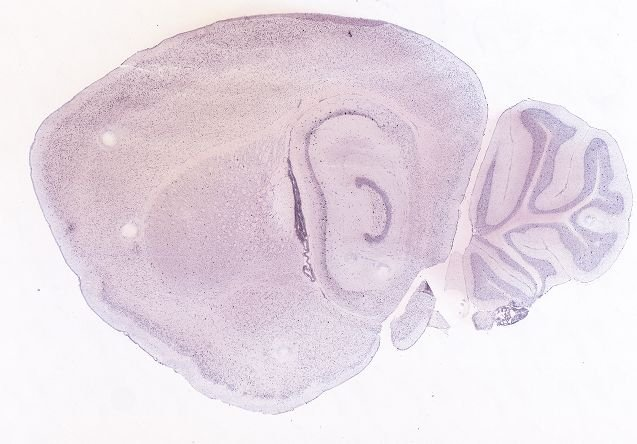

In [3]:
# Animation function
name = 'Mxra7'
img_ids = get_img_id(name) # img_ids[i][j] gives id for image in experiment i, slice j

# Print an example image
Image('http://api.brain-map.org/api/v2/section_image_download/'+str(img_ids[0][2])+'?downsample=4.jpg')